In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import joblib
from tkinter import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [40]:
data = pd.read_csv('D:\\TITO\\Documents\\BANGKIT\\capstone\\price_prediction\\data\\price.csv')

In [41]:
data.head()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,Bawal Hitam,36000,B,Farmed,Moderately sustainable,30000
1,Bawal Putih,72000,B,Farmed,Moderately sustainable,60000
2,Cakalang,30000,B,Farmed,Moderately sustainable,25000
3,Kakap Merah,66000,B,Farmed,Moderately sustainable,55000
4,Kembung,30000,B,Farmed,Moderately sustainable,25000


In [42]:
data.shape

(264, 6)

In [43]:
data.isnull().sum()

Fish Species       0
Price              0
Grade              0
Catching Method    0
Sustainability     0
Actual Price       0
dtype: int64

In [44]:
data.describe()

,Price,Actual Price
count,264.000000,264.000000
mean,49903.363636,68454.545455
std,59375.759491,69461.411301
min,6000.000000,25000.000000
25%,19200.000000,30000.000000
50%,30200.000000,55000.000000
75%,55250.000000,70000.000000
max,403200.000000,280000.000000


In [45]:
sorted(data['Price'],reverse=True)

[403200,
 336000,
 336000,
 322560,
 280000,
 268800,
 268800,
 268800,
 224000,
 224000,
 215040,
 201600,
 179200,
 168000,
 168000,
 161280,
 140000,
 134400,
 134400,
 115200,
 112000,
 112000,
 100800,
 96000,
 96000,
 92160,
 89600,
 86400,
 86400,
 84000,
 84000,
 84000,
 80640,
 80000,
 79200,
 76800,
 76800,
 76800,
 72000,
 72000,
 72000,
 72000,
 70000,
 69120,
 69120,
 67200,
 67200,
 67200,
 67200,
 66000,
 66000,
 64000,
 64000,
 63360,
 61440,
 60000,
 60000,
 57600,
 57600,
 57600,
 57600,
 57600,
 57600,
 57600,
 56000,
 56000,
 55000,
 54720,
 53760,
 52800,
 52800,
 52800,
 51200,
 50400,
 48000,
 48000,
 48000,
 48000,
 48000,
 48000,
 46080,
 46080,
 46080,
 45600,
 45600,
 44800,
 44000,
 44000,
 43776,
 43200,
 43200,
 43200,
 43200,
 42240,
 42000,
 42000,
 40320,
 40000,
 39600,
 38400,
 38400,
 38400,
 38400,
 38000,
 36480,
 36480,
 36480,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 35200,
 35000,
 34560,
 34560,
 34560,
 

In [8]:
# data = data[~(data['Price']>=6000.0) & (data['Price']<=403200.0)]
# data.shape
# data.head()

# Data mapping humu humu~

In [46]:
data['Fish Species'].unique()
data['Fish Species'] = data['Fish Species'].map({'Bawal Hitam':0,'Bawal Putih':1,'Cakalang':2,
                                                 "Kakap Merah":3,"Kembung":4,"Kerapu":5,
                                                 "Kuwe":6,"Makerel":7,"Salmon":8,
                                                 "Tenggiri":9,"Tongkol":10})

In [47]:
data['Grade'].unique()
data['Grade'] = data['Grade'].map({'C':0,'B':1,'A':2})

In [48]:
data['Sustainability'].unique()
data['Sustainability'] =data['Sustainability'].map({'Moderately sustainable':1,'Unsustainable':0})


In [49]:
data['Catching Method'].unique()
data['Catching Method'] = data['Catching Method'].map({'Farmed':3,'Netting':2, 'Spearfishing':0, 'Fishing Hook':1})

# Data Normalization humu humu~

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
data['Actual Price'] = scaler.fit_transform(data[['Actual Price']])
data['Price'] = scaler2.fit_transform(data[['Price']])

In [51]:
data.head()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,0,0.075529,1,3,1,0.019608
1,1,0.166163,1,3,1,0.137255
2,2,0.060423,1,3,1,0.000000
3,3,0.151057,1,3,1,0.117647
4,4,0.060423,1,3,1,0.000000


In [52]:
print(scaler.inverse_transform(data[['Actual Price']]))

[[ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]

In [53]:
data

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,0,0.075529,1,3,1,0.019608
1,1,0.166163,1,3,1,0.137255
2,2,0.060423,1,3,1,0.000000
3,3,0.151057,1,3,1,0.117647
4,4,0.060423,1,3,1,0.000000
...,...,...,...,...,...,...
259,6,0.041289,0,1,0,0.176471
260,7,0.009063,0,1,0,0.019608
261,8,0.210473,0,1,0,1.000000
262,9,0.033233,0,1,0,0.137255


# Feature and label split humu humu~

In [54]:
X = data.drop(['Price', 'Fish Species'],axis=1)
y = data['Price']
print(X.head())
print(y.head())

   Grade  Catching Method  Sustainability  Actual Price
0      1                3               1      0.019608
1      1                3               1      0.137255
2      1                3               1      0.000000
3      1                3               1      0.117647
4      1                3               1      0.000000
0    0.075529
1    0.166163
2    0.060423
3    0.151057
4    0.060423
Name: Price, dtype: float64


# Train test split humu humu~

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
import tensorflow as tf

# Model 1 humu humu~

In [57]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(1, activation='linear')
])

In [58]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['mse'])

In [59]:
history = model.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 27ms/step - loss: 0.6904 - mse: 0.6904 - val_loss: 0.7260 - val_mse: 0.7260
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.4727 - mse: 0.4727 - val_loss: 0.5018 - val_mse: 0.5018
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.3156 - mse: 0.3156 - val_loss: 0.3353 - val_mse: 0.3353
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.2011 - mse: 0.2011 - val_loss: 0.2205 - val_mse: 0.2205
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1281 - mse: 0.1281 - val_loss: 0.1439 - val_mse: 0.1439
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0819 - mse: 0.0819 - val_loss: 0.0969 - val_mse: 0.0969
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0538 - mse: 0.0538 - val_loss: 0.0700 - val_mse: 0.0700
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0394 - mse: 0.0394 -

# Model 2 humu humu~

In [60]:
model_complex = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [61]:
model_complex.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['mse'])

In [62]:
history2 = model_complex.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 30ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.0683 - val_mse: 0.0683
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0570 - val_mse: 0.0570
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0033 - mse: 0.0033

# Model 3 humu humu~

In [155]:
model_that_she_not_worry_about = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Reshape((2, 10)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(1, activation='linear')
])

In [156]:
model_that_she_not_worry_about.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['mse'])

In [157]:
history3 = model_that_she_not_worry_about.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 123ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 2/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0507 - val_mse: 0.0507
Epoch 3/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0452 - val_mse: 0.0452
Epoch 4/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0428 - val_mse: 0.0428
Epoch 5/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 6/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 7/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 8/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0144 - mse: 0.0

# Model 4 humu humu~

In [159]:
model_using_huber = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(25, activation='relu'),  # Add an additional dense layer to match the expected output shape
    tf.keras.layers.Reshape((5, 5)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(1)
])

In [160]:
model_using_huber.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber(), metrics=['mse'])

In [161]:
history4 = model_using_huber.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 126ms/step - loss: 0.0085 - mse: 0.0169 - val_loss: 0.0221 - val_mse: 0.0442
Epoch 2/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0077 - mse: 0.0154 - val_loss: 0.0233 - val_mse: 0.0466
Epoch 3/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0072 - mse: 0.0144 - val_loss: 0.0224 - val_mse: 0.0448
Epoch 4/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0068 - mse: 0.0135 - val_loss: 0.0204 - val_mse: 0.0407
Epoch 5/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0065 - mse: 0.0131 - val_loss: 0.0197 - val_mse: 0.0393
Epoch 6/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0063 - mse: 0.0126 - val_loss: 0.0195 - val_mse: 0.0389
Epoch 7/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0060 - mse: 0.0121 - val_loss: 0.0183 - val_mse: 0.0367
Epoch 8/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0058 - mse: 0.0

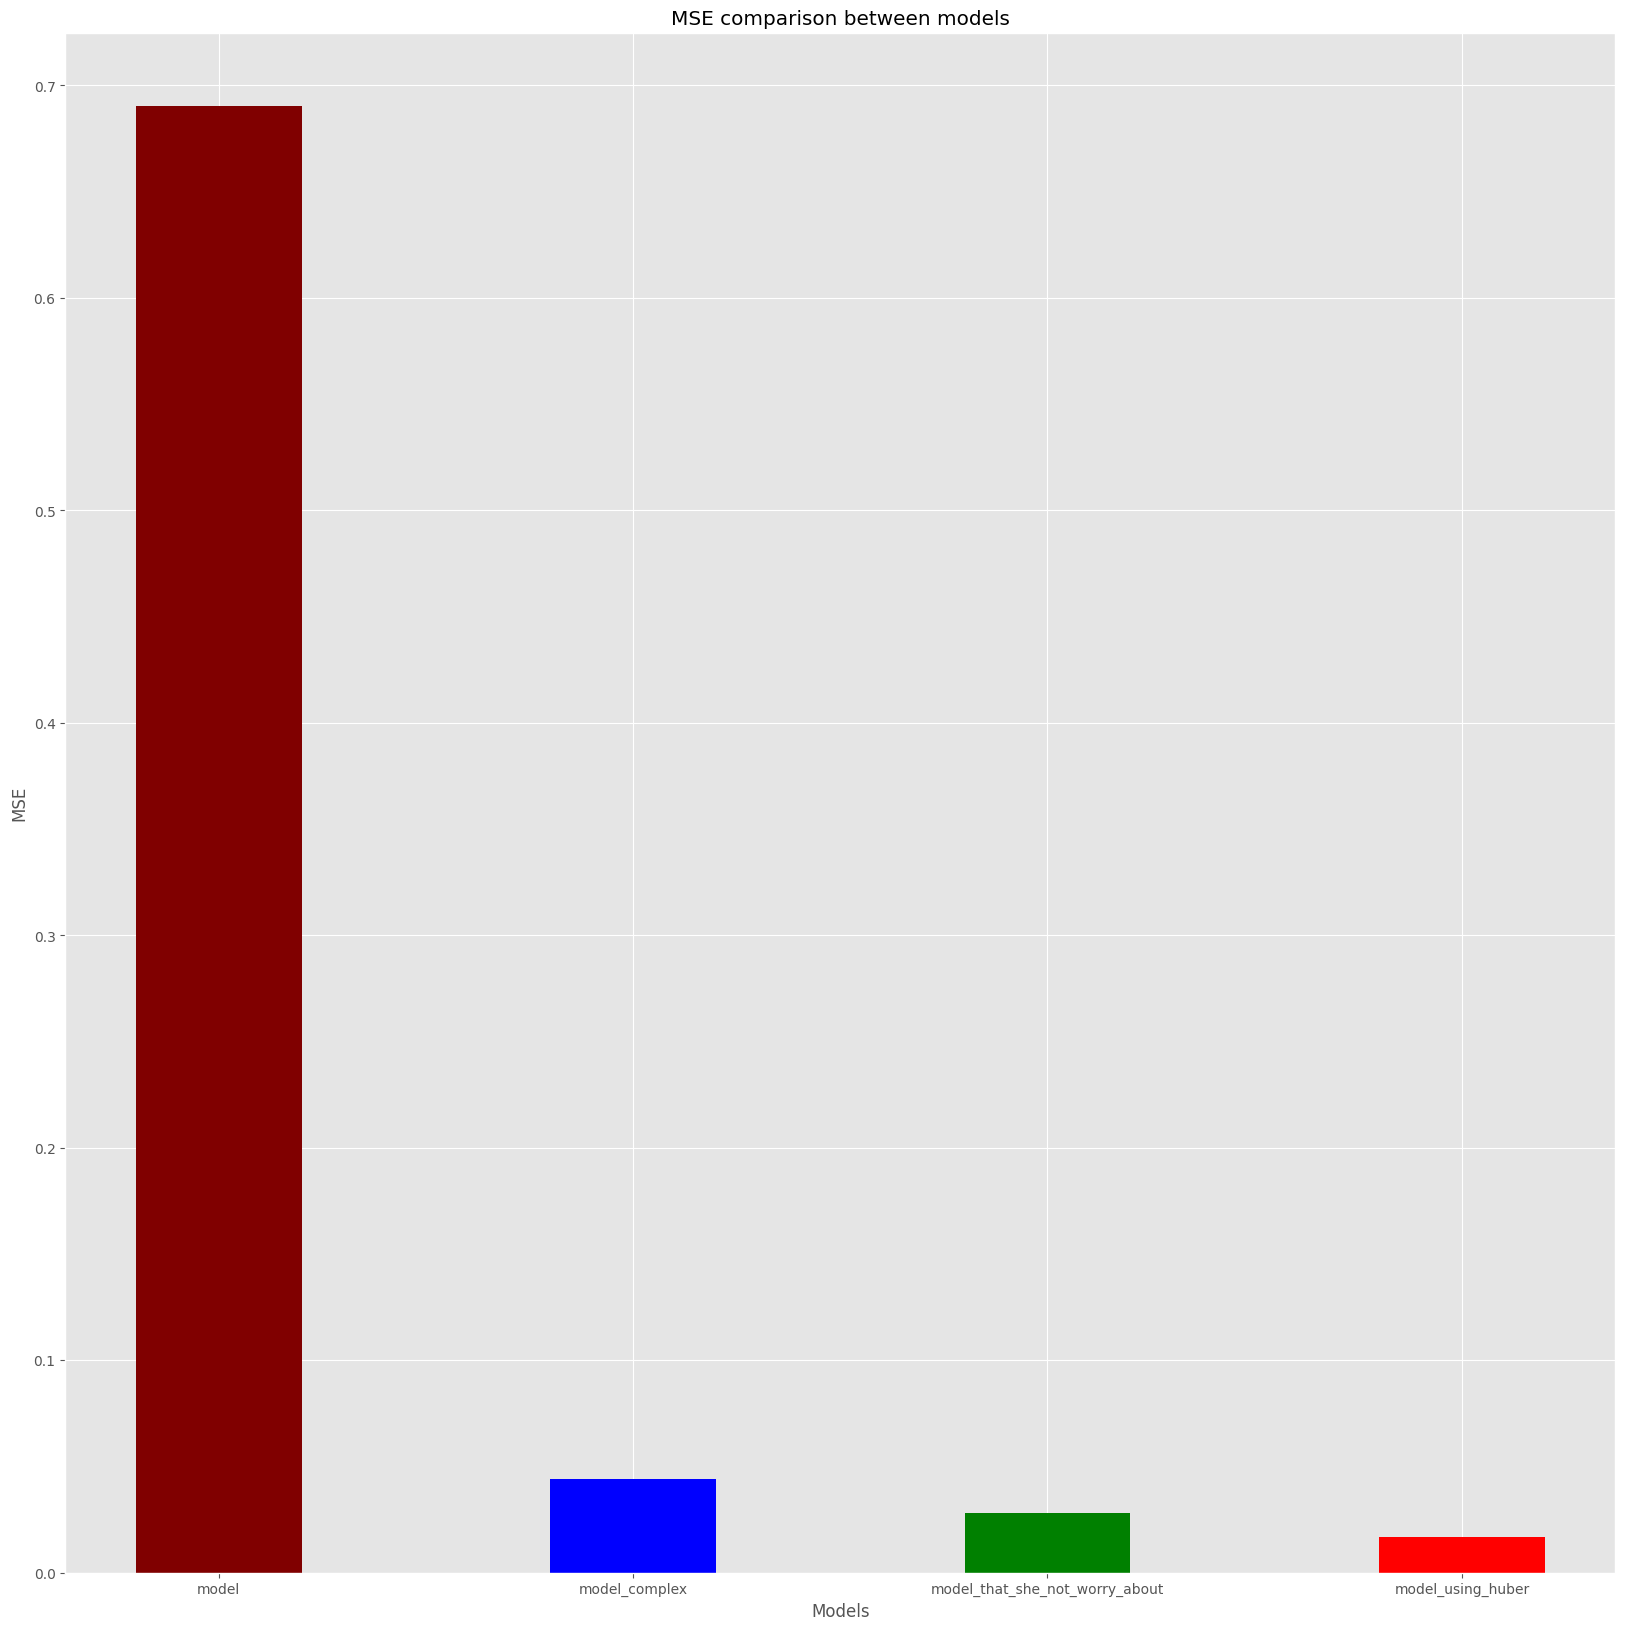

In [162]:
import numpy as np
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (20, 20))

# creating the bar plot
plt.bar("model",history.history['mse'], color ='maroon', width = 0.4)
plt.bar("model_complex",history2.history['mse'], color ='blue', width = 0.4)
plt.bar("model_that_she_not_worry_about",history3.history['mse'], color ='green', width = 0.4)
plt.bar("model_using_huber",model_using_huber.history.history['mse'], color ='red', width = 0.4)

plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("MSE comparison between models")
plt.show()


(0.0, 50.0)

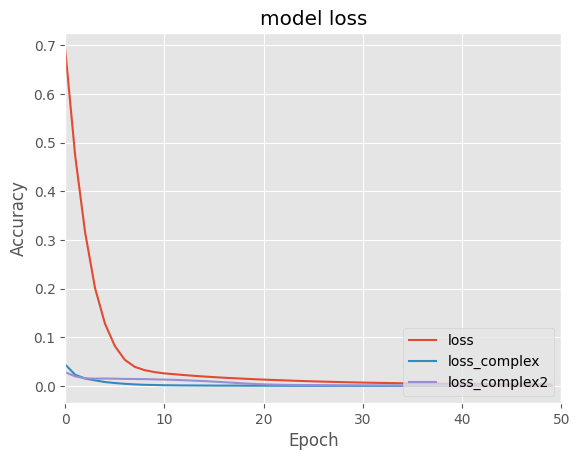

In [163]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.title('model loss')
plt.plot(history.history['mse'][:50], label='loss')
plt.plot(history2.history['mse'][:50], label='loss_complex')
plt.plot(history3.history['mse'][:50], label='loss_complex2')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.xlim(0, 50)


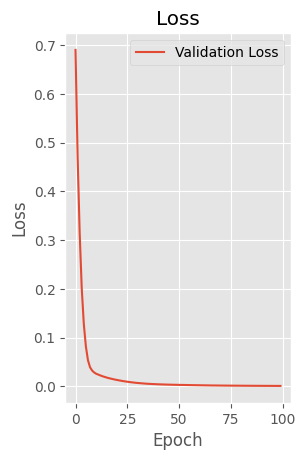

In [84]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Validation Loss')
# Add any additional metrics you want to plot, e.g., accuracy
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [164]:
y_pred1 = model.predict(X_test)
score1 = metrics.r2_score(y_test,y_pred1)
y_pred2 = model_complex.predict(X_test)
score2 = metrics.r2_score(y_test,y_pred2)
y_pred3 = model_that_she_not_worry_about.predict(X_test)
score3 = metrics.r2_score(y_test,y_pred3)
y_pred4 = model_using_huber.predict(X_test)
score4 = metrics.r2_score(y_test,y_pred4)
print('model1 : ',score1)
print('model2 : ',score2)
print('model3 : ',score3)
print('model4 : ',score4)

model1 :  0.9435390570606494
model2 :  0.9786431243610267
model3 :  0.9892724457162655
model4 :  0.9876553864129854


In [200]:
print(X.shape)
print(y.shape)

(264, 4)
(264,)


In [226]:
arr = scaler.inverse_transform(data[['Actual Price']])
arr2 = []
for array in arr :
    arr2.append(array[0])
    
print(arr2)

[30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0, 30000.0, 60000.0, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 60000.0, 38000.0,

In [235]:
arr_price = scaler2.inverse_transform(data[['Price']])
arr_price2 = []
for array in arr_price :
    arr_price2.append(array[0])
print(arr_price2)

[36000.0, 72000.0, 30000.0, 66000.0, 30000.0, 96000.0, 83999.99999999999, 36000.0, 336000.0, 72000.0, 45600.0, 43200.0, 86399.99999999999, 36000.0, 79200.0, 36000.0, 115200.00000000001, 100800.0, 43200.0, 403200.0, 86399.99999999999, 54720.0, 18000.0, 36000.0, 15000.0, 33000.0, 15000.0, 48000.0, 42000.0, 18000.0, 168000.0, 36000.0, 22800.0, 30000.0, 59999.999999999985, 25000.0, 55000.0, 25000.0, 80000.0, 70000.0, 30000.0, 280000.0, 59999.999999999985, 38000.0, 36000.0, 72000.0, 30000.0, 66000.0, 30000.0, 96000.0, 83999.99999999999, 36000.0, 336000.0, 72000.0, 45600.0, 15000.0, 30000.0, 12500.0, 27500.0, 12500.0, 40000.0, 35000.0, 15000.0, 140000.0, 30000.0, 19000.0, 18000.0, 36000.0, 15000.0, 33000.0, 15000.0, 48000.0, 42000.0, 18000.0, 168000.0, 36000.0, 22800.0, 21600.0, 43200.0, 18000.0, 39600.0, 18000.0, 57600.00000000001, 50400.0, 21600.0, 201600.0, 43200.0, 27360.0, 9000.0, 18000.0, 7500.0, 16500.0, 7500.0, 24000.0, 21000.0, 9000.0, 83999.99999999999, 18000.0, 11400.0, 24000.0, 4

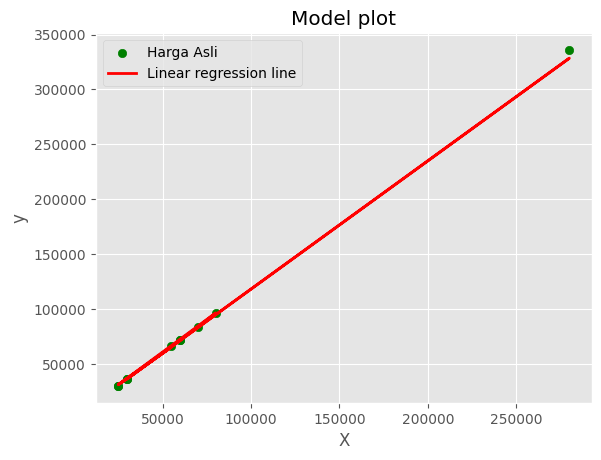

In [249]:
xt = X.T
y_pred_humu = model_that_she_not_worry_about.predict(X)
plt.scatter(arr2[:10], arr_price2[:10], color='green', label='Harga Asli')
plt.plot(arr2[:10], scaler2.inverse_transform(y_pred_humu[:10]), color='red', linewidth=2, label='Linear regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Model plot')
plt.show()

In [82]:
model.save('D:\\TITO\\Documents\\BANGKIT\\capstone\\bloomy_price_prediction\\bloomy-price-predictor\\price_predictor.h5')

In [83]:
model_complex.save('D:\\TITO\\Documents\\BANGKIT\\capstone\\bloomy_price_prediction\\bloomy-price-predictor\\price_predictor_complex.h5')

In [111]:
model_that_she_not_worry_about.save('D:\\TITO\\Documents\\BANGKIT\\capstone\\bloomy_price_prediction\\bloomy-price-predictor\\price_predictor_complex_lstm.h5')

In [165]:
model_using_huber.save('D:\\TITO\\Documents\\BANGKIT\\capstone\\bloomy_price_prediction\\bloomy-price-predictor\\price_predictor_complex_lstm_huber.h5')

In [105]:
import numpy as np
import math

In [250]:
# Bulatkan ke kelipatan ribuan humu humu~
def bulatkan_ke_kelipatan(angka, kelipatan):
    ke_atas = kelipatan * ((angka + kelipatan - 1) // kelipatan)
    ke_bawah = kelipatan * (angka // kelipatan)

    if abs(angka - ke_atas) < abs(angka - ke_bawah):
        return ke_atas
    else:
        return ke_bawah

In [147]:
def predict_price(data, model):
    prediction = model.predict(data)
    prediction = scaler2.inverse_transform(prediction)
    prediction_float = prediction.item()
    rounded_value = bulatkan_ke_kelipatan(round(prediction_float, 0),1000)
    
    return rounded_value

In [170]:
# mapping sorted from 0 to 4 guide
# Grade = C,B,A
# Catching method = Spearfishing, Fishing Hook, Netting, Farmed
# Sustainability = Unsustainable, Moderately sustainable
data_new = pd.DataFrame({
    'Grade':2,
    'Catching Method':3,
    'Sustainability':1,
    'Actual Price' : 30000

},index=[0])

if data_new['Grade'].iloc[0] == 0 or data_new['Actual Price'].iloc[0] == 0:
    result_array = np.array([0])
    float_number = float(result_array[0])
    price = float_number
else:
    data_new['Actual Price'] = scaler.transform(data_new[['Actual Price']])
    # price1 = predict_price(data_new,model)
    price2 = predict_price(data_new,model_complex)
    price3 = predict_price(data_new,model_that_she_not_worry_about)
    price4 = predict_price(data_new,model_using_huber)
    average_price = bulatkan_ke_kelipatan((price2 + price3 + price4)/3, 1000)
    result_array = np.array([price2,price3, price4], dtype=int)
    
    
    
print(result_array)
print(average_price)

[18000 21000 18000]
19000.0
